# EfficientSAM3 ARM Inference Test

This notebook demonstrates how to use EfficientSAM3 on ARM devices (Apple Silicon) for image segmentation.

**Key Features:**
- ✅ ARM-optimized (Apple Silicon MPS support)
- ✅ No CUDA/Triton dependencies
- ✅ Text-based grounding
- ✅ Bounding box prompts
- ✅ Multi-object detection

## 1. Setup and Imports

First, let's import the required libraries and check our device availability.

In [1]:
import os
import sys
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import warnings

warnings.filterwarnings('ignore')

# Check device availability
print("🖥️  Device Availability:")
print(f"   CPU: Available")
print(f"   CUDA: {'Available' if torch.cuda.is_available() else 'Not available'}")
print(f"   MPS: {'Available' if torch.backends.mps.is_available() else 'Not available'}")
print(f"\n📦 PyTorch version: {torch.__version__}")

🖥️  Device Availability:
   CPU: Available
   CUDA: Not available
   MPS: Available

📦 PyTorch version: 2.9.1


## 2. Select Device

Choose the best available device for inference.

In [2]:
# Auto-select best device
if torch.backends.mps.is_available():
    device = "mps"
    print("✅ Using Apple Silicon MPS acceleration")
elif torch.cuda.is_available():
    device = "cuda"
    print(f"✅ Using CUDA GPU: {torch.cuda.get_device_name(0)}")
else:
    device = "cpu"
    print("✅ Using CPU")

print(f"\nSelected device: {device}")

✅ Using Apple Silicon MPS acceleration

Selected device: mps


## 3. Load the Model

Load the EfficientSAM3 model with the ARM-optimized builder.

In [3]:
from efficientsam3_arm.model_builder_arm import build_efficientsam3_image_model
from efficientsam3_arm.model.sam3_image_processor import Sam3Processor

# Model configuration
checkpoint_path = "weights/efficient_sam3_repvit-m0_9_mobileclip_s1.pth"
backbone_type = "repvit"
model_name = "m0_9"

print("🏗️  Building EfficientSAM3 model...")
print(f"   Checkpoint: {checkpoint_path}")
print(f"   Backbone: {backbone_type}/{model_name}")
print(f"   Device: cpu")
print(f"   Instance interactivity: Disabled (using grounding mode)")
print("\nThis may take a moment...\n")

# Load model with text encoder
# Note: enable_inst_interactivity=False for pure grounding/detection
# Set to True if you need SAM-style point/box interactive segmentation
model = build_efficientsam3_image_model(
    checkpoint_path=checkpoint_path,
    backbone_type=backbone_type,
    model_name=model_name,
    text_encoder_type="MobileCLIP-S1",
    device="cpu",
    enable_inst_interactivity=False,  # Set to True for SAM-style interactive segmentation
)

print("✅ Model loaded successfully!")

🏗️  Building EfficientSAM3 model...
   Checkpoint: weights/efficient_sam3_repvit-m0_9_mobileclip_s1.pth
   Backbone: repvit/m0_9
   Device: cpu
   Instance interactivity: Disabled (using grounding mode)

This may take a moment...

✅ Model loaded successfully!


In [5]:
image = Image.open("efficientsam3_arm/CrossWalk.jpg").convert("RGB")

FileNotFoundError: [Errno 2] No such file or directory: 'efficientsam3_arm/CrossWalk.jpg'

In [7]:
# Process image and predict with text prompt
print("🔧 Setting up processor with CPU device...")
processor = Sam3Processor(model=model, device="cpu", confidence_threshold=0.2)

# Verify model device
sample_param = next(model.parameters())
print(f"✅ Model device: {sample_param.device}")
print(f"✅ Processor device: {processor.device}")

print("\n🖼️  Processing image...")
inference_state = processor.set_image(image)

print("🔍 Running inference with text prompt 'shoe'...")
inference_state = processor.set_text_prompt(state=inference_state, prompt="shoe")

print("🎭 Getting masks and scores...")
# Get results directly from the inference state
masks = inference_state["masks"].cpu().numpy()
boxes = inference_state["boxes"].cpu().numpy()
scores = inference_state["scores"].cpu().numpy()

print(f"\n✅ Inference complete!")
print(f"   Found {len(masks)} object(s)")
print(f"   Scores: {scores}")
print(f"   Boxes shape: {boxes.shape}")
print(f"   Masks shape: {masks.shape}")

🔧 Setting up processor with CPU device...
✅ Model device: cpu
✅ Processor device: cpu

🖼️  Processing image...
🔍 Running inference with text prompt 'shoe'...
🔍 Running inference with text prompt 'shoe'...
🎭 Getting masks and scores...

✅ Inference complete!
   Found 44 object(s)
   Scores: [0.31624106 0.37564275 0.40879208 0.286584   0.32458842 0.32449353
 0.21109101 0.21477404 0.5254801  0.24444087 0.2830177  0.23611598
 0.31596947 0.27796307 0.41794854 0.43426988 0.5170338  0.23521224
 0.20050085 0.2485932  0.40718055 0.28358543 0.2618622  0.22781584
 0.491376   0.41709897 0.25375348 0.26411283 0.24511614 0.25291362
 0.29828387 0.32149163 0.38345867 0.41248262 0.2098721  0.20050776
 0.23391949 0.2936814  0.40784425 0.3296199  0.42603502 0.24054286
 0.59825295 0.2604423 ]
   Boxes shape: (44, 4)
   Masks shape: (44, 1, 3376, 6000)
🎭 Getting masks and scores...

✅ Inference complete!
   Found 44 object(s)
   Scores: [0.31624106 0.37564275 0.40879208 0.286584   0.32458842 0.32449353
 0.


🖼️  Visualizing results...
found 44 object(s)


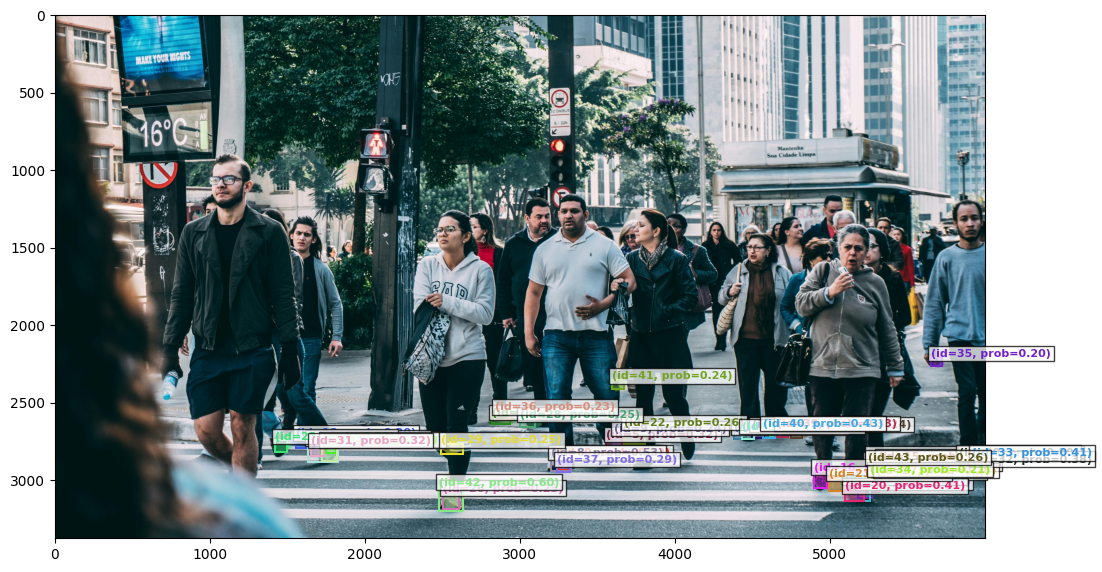

In [8]:
from efficientsam3_arm.visualization_utils.visualization_utils import draw_box_on_image, normalize_bbox, plot_results

# Visualize results
print("\n🖼️  Visualizing results...")
plot_results(image, inference_state)


In [9]:
# Process image and predict with text prompt
print("🔧 Setting up processor with CPU device...")
processor = Sam3Processor(model=model, device="cpu", confidence_threshold=0.2)

# Verify model device
sample_param = next(model.parameters())
print(f"✅ Model device: {sample_param.device}")
print(f"✅ Processor device: {processor.device}")

print("\n🖼️  Processing image...")
inference_state = processor.set_image(image)

print("🔍 Running inference with text prompt 'shoe'...")
inference_state = processor.set_text_prompt(state=inference_state, prompt="person")

print("🎭 Getting masks and scores...")
# Get results directly from the inference state
masks = inference_state["masks"].cpu().numpy()
boxes = inference_state["boxes"].cpu().numpy()
scores = inference_state["scores"].cpu().numpy()

print(f"\n✅ Inference complete!")
print(f"   Found {len(masks)} object(s)")
print(f"   Scores: {scores}")
print(f"   Boxes shape: {boxes.shape}")
print(f"   Masks shape: {masks.shape}")

🔧 Setting up processor with CPU device...
✅ Model device: cpu
✅ Processor device: cpu

🖼️  Processing image...
🔍 Running inference with text prompt 'shoe'...
🔍 Running inference with text prompt 'shoe'...
🎭 Getting masks and scores...

✅ Inference complete!
   Found 16 object(s)
   Scores: [0.25965002 0.20332277 0.39001763 0.24503486 0.40193078 0.20588988
 0.24832998 0.3917326  0.3655324  0.24167381 0.20574681 0.21859828
 0.20968832 0.38048822 0.3392496  0.37010428]
   Boxes shape: (16, 4)
   Masks shape: (16, 1, 3376, 6000)
🎭 Getting masks and scores...

✅ Inference complete!
   Found 16 object(s)
   Scores: [0.25965002 0.20332277 0.39001763 0.24503486 0.40193078 0.20588988
 0.24832998 0.3917326  0.3655324  0.24167381 0.20574681 0.21859828
 0.20968832 0.38048822 0.3392496  0.37010428]
   Boxes shape: (16, 4)
   Masks shape: (16, 1, 3376, 6000)



🖼️  Visualizing results...
found 16 object(s)


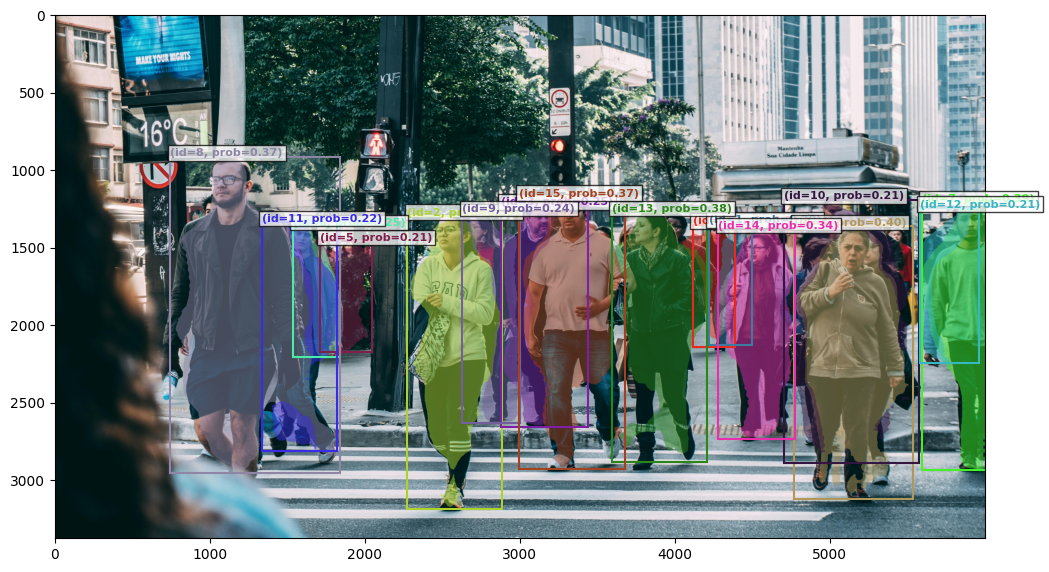

In [10]:
# Visualize results
print("\n🖼️  Visualizing results...")
plot_results(image, inference_state)

## 4. Initialize the Processor

Create the ARM-optimized processor for handling image preprocessing and inference.

## 5. Load Test Image

Load the persons image for testing.

   Size: 6000 x 3376 pixels


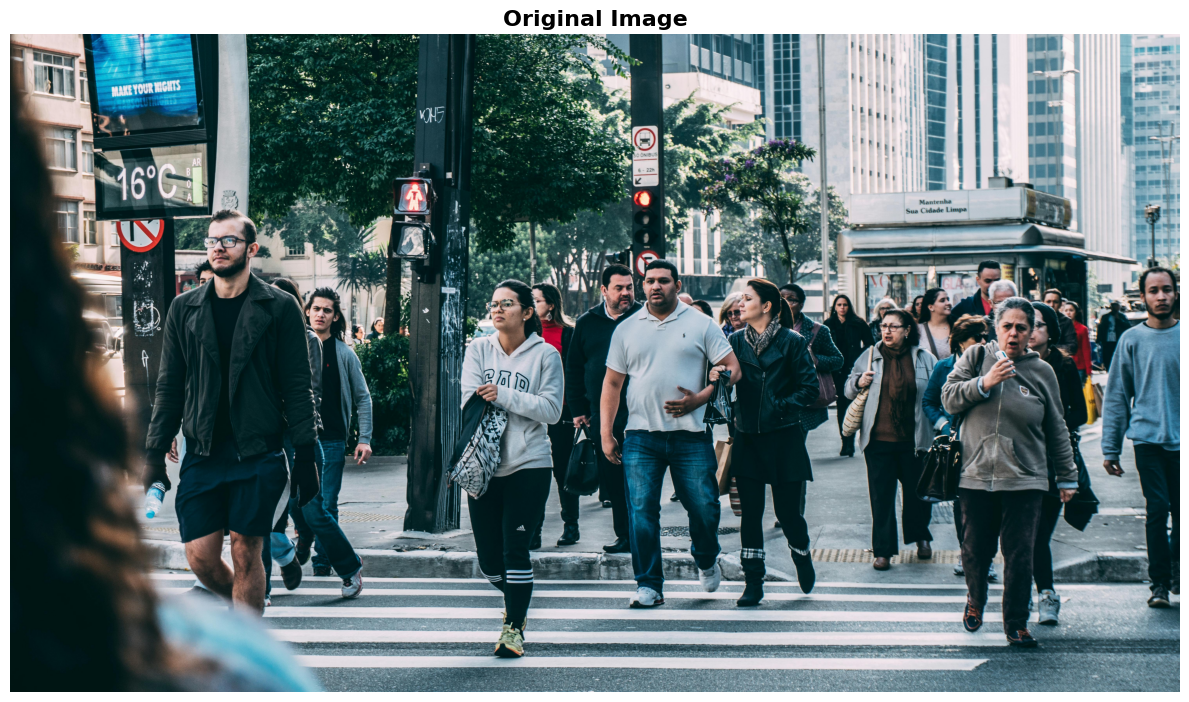

In [12]:
# Load image
image = Image.open("efficientsam3_arm/assets/persons.jpg").convert("RGB")

print(f"   Size: {image.size[0]} x {image.size[1]} pixels")

# Display original image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Original Image', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Text-Guided Segmentation

Use text prompts to detect and segment objects in the image.

### 6.1. Detect People

In [14]:
# Set image and text prompt
text_prompt = "person"

print(f"🔍 Running inference with prompt: '{text_prompt}'")
print("   Processing...")

# Run inference
state = processor.set_image(image)
state = processor.set_text_prompt(state=state, prompt=text_prompt)

# Get results
masks = state["masks"].cpu().numpy()
boxes = state["boxes"].cpu().numpy()
scores = state["scores"].cpu().numpy()

print(f"\n✅ Detection complete!")
print(f"   Found {len(boxes)} person(s)")
print(f"   Confidence scores: {scores}")

🔍 Running inference with prompt: 'person'
   Processing...

✅ Detection complete!
   Found 16 person(s)
   Confidence scores: [0.25965002 0.20332277 0.39001763 0.24503486 0.40193078 0.20588988
 0.24832998 0.3917326  0.3655324  0.24167381 0.20574681 0.21859828
 0.20968832 0.38048822 0.3392496  0.37010428]

✅ Detection complete!
   Found 16 person(s)
   Confidence scores: [0.25965002 0.20332277 0.39001763 0.24503486 0.40193078 0.20588988
 0.24832998 0.3917326  0.3655324  0.24167381 0.20574681 0.21859828
 0.20968832 0.38048822 0.3392496  0.37010428]


### 6.2. Visualize Results

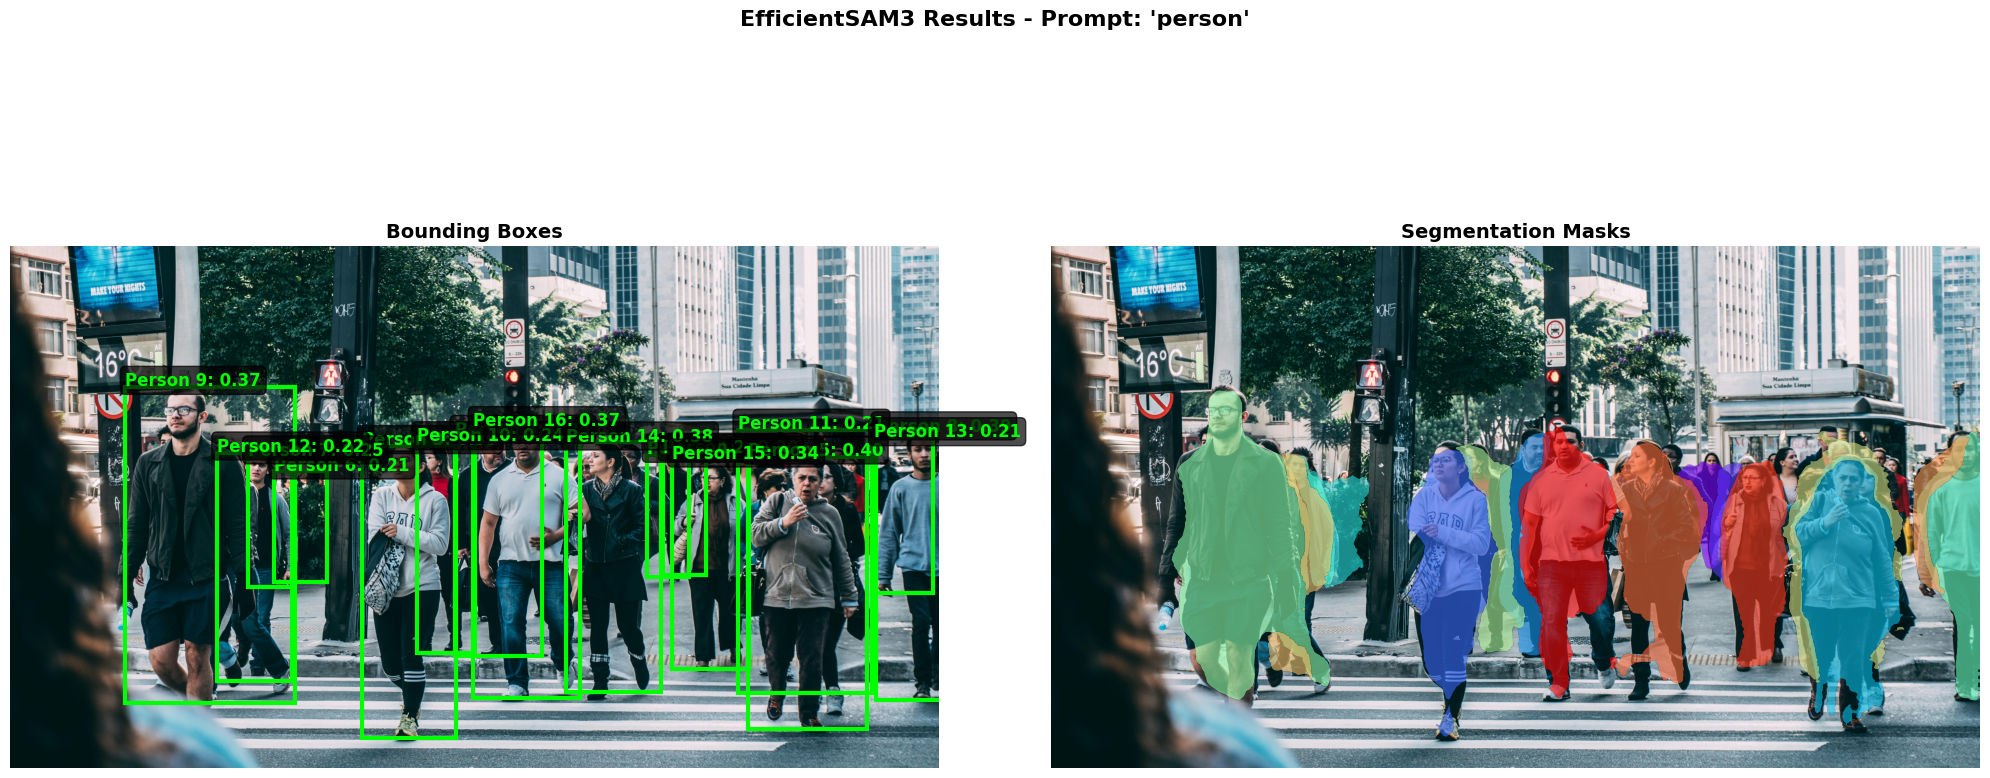

In [15]:
def show_masks_and_boxes(image, masks, boxes, scores, title="Detections"):
    """
    Visualize detection results with masks and bounding boxes.
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    # Show original image with boxes
    axes[0].imshow(image)
    axes[0].set_title('Bounding Boxes', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Draw boxes
    for i, (box, score) in enumerate(zip(boxes, scores)):
        x0, y0, x1, y1 = box
        w, h = x1 - x0, y1 - y0
        rect = Rectangle(
            (x0, y0), w, h,
            linewidth=3,
            edgecolor='lime',
            facecolor='none'
        )
        axes[0].add_patch(rect)
        # Add label with confidence score
        axes[0].text(
            x0, y0 - 10,
            f'Person {i+1}: {score:.2f}',
            color='lime',
            fontsize=12,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.7)
        )
    
    # Show image with masks
    axes[1].imshow(image)
    axes[1].set_title('Segmentation Masks', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    # Overlay masks with different colors
    colors = plt.cm.rainbow(np.linspace(0, 1, len(masks)))
    for mask, color in zip(masks, colors):
        mask_colored = np.zeros((*mask.shape[1:], 4))
        mask_colored[mask[0] > 0] = [*color[:3], 0.6]  # RGB + alpha
        axes[1].imshow(mask_colored)
    
    plt.suptitle(title, fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# Visualize results
show_masks_and_boxes(
    image, masks, boxes, scores,
    title=f"EfficientSAM3 Results - Prompt: '{text_prompt}'"
)

### 6.3. Individual Mask Visualization

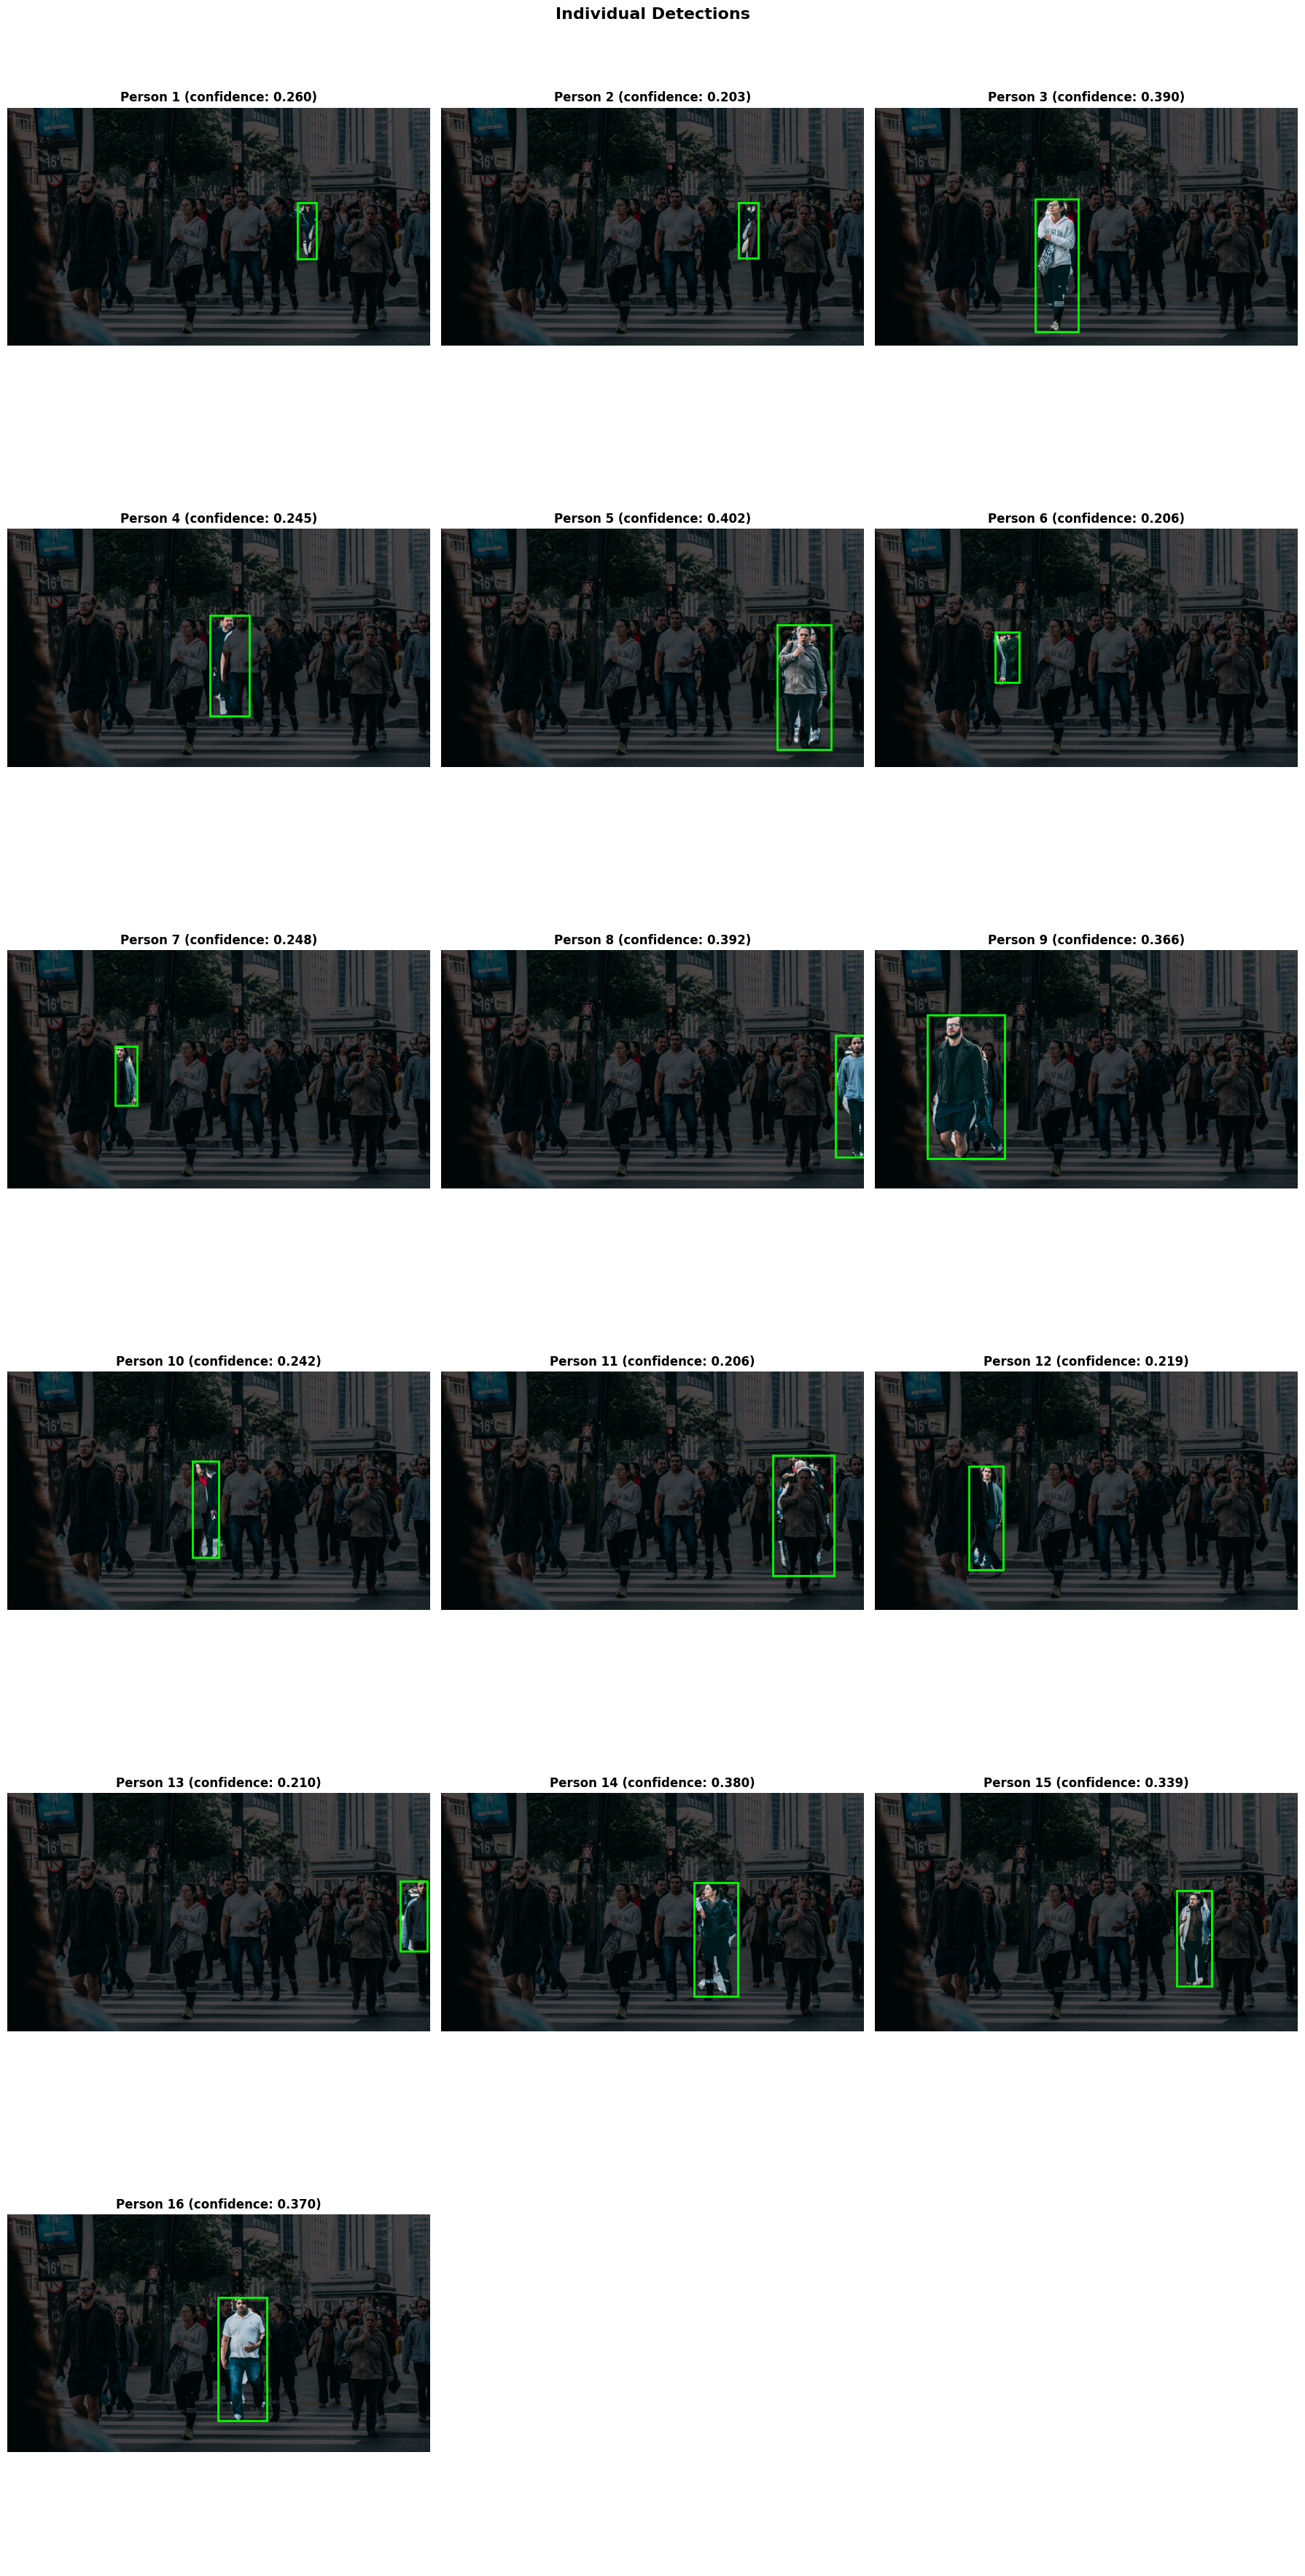

In [16]:
# Show each detected person separately
num_detections = len(masks)
if num_detections > 0:
    cols = min(3, num_detections)
    rows = (num_detections + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    if num_detections == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, (mask, box, score) in enumerate(zip(masks, boxes, scores)):
        # Create masked image
        img_array = np.array(image)
        masked_img = img_array.copy()
        masked_img[~mask[0]] = masked_img[~mask[0]] * 0.3  # Dim background
        
        axes[i].imshow(masked_img)
        axes[i].set_title(
            f'Person {i+1} (confidence: {score:.3f})',
            fontsize=12,
            fontweight='bold'
        )
        axes[i].axis('off')
        
        # Draw bounding box
        x0, y0, x1, y1 = box
        w, h = x1 - x0, y1 - y0
        rect = Rectangle(
            (x0, y0), w, h,
            linewidth=2,
            edgecolor='lime',
            facecolor='none'
        )
        axes[i].add_patch(rect)
    
    # Hide unused subplots
    for i in range(num_detections, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle('Individual Detections', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  No detections found")

## 7. Multi-Class Detection

Try detecting multiple object types at once.

In [23]:
# Try multiple object types
multi_prompt = "chemise"

print(f"🔍 Running multi-class detection with prompt: '{multi_prompt}'")
print("   Processing...")

# Reset and run new inference
state_multi = processor.set_image(image)
state_multi = processor.set_text_prompt(state=state_multi, prompt=multi_prompt)

# Get results
masks_multi = state_multi["masks"].cpu().numpy()
boxes_multi = state_multi["boxes"].cpu().numpy()
scores_multi = state_multi["scores"].cpu().numpy()

print(f"\n✅ Multi-class detection complete!")
print(f"   Found {len(boxes_multi)} object(s)")
print(f"   Confidence scores: {scores_multi}")

# Visualize
if len(boxes_multi) > 0:
    show_masks_and_boxes(
        image, masks_multi, boxes_multi, scores_multi,
        title=f"Multi-Class Detection - Prompt: '{multi_prompt}'"
    )
else:
    print("⚠️  No objects detected")

🔍 Running multi-class detection with prompt: 'chemise'
   Processing...

✅ Multi-class detection complete!
   Found 0 object(s)
   Confidence scores: []
⚠️  No objects detected

✅ Multi-class detection complete!
   Found 0 object(s)
   Confidence scores: []
⚠️  No objects detected


## 8. Adjust Confidence Threshold

Experiment with different confidence thresholds to control detection sensitivity.

In [24]:
# Test different confidence thresholds
thresholds = [0.1, 0.3, 0.5, 0.7]

print("🔍 Testing different confidence thresholds...\n")

for threshold in thresholds:
    # Update threshold
    processor.set_confidence_threshold(threshold)
    
    # Run inference
    state_thresh = processor.set_image(image)
    state_thresh = processor.set_text_prompt(state=state_thresh, prompt="person")

    num_detections = len(state_thresh["boxes"])
    avg_score = state_thresh["scores"].mean().item() if num_detections > 0 else 0
    
    print(f"Threshold {threshold:.1f}: {num_detections} detection(s), avg score: {avg_score:.3f}")

# Reset to default
processor.set_confidence_threshold(0.3)
print("\n✅ Reset to default threshold (0.3)")

🔍 Testing different confidence thresholds...

Threshold 0.1: 56 detection(s), avg score: 0.179
Threshold 0.1: 56 detection(s), avg score: 0.179
Threshold 0.3: 7 detection(s), avg score: 0.377
Threshold 0.3: 7 detection(s), avg score: 0.377
Threshold 0.5: 0 detection(s), avg score: 0.000
Threshold 0.5: 0 detection(s), avg score: 0.000
Threshold 0.7: 0 detection(s), avg score: 0.000

✅ Reset to default threshold (0.3)
Threshold 0.7: 0 detection(s), avg score: 0.000

✅ Reset to default threshold (0.3)


## 9. Performance Benchmark

Measure inference time and throughput.

⏱️  Running performance benchmark...

Run 1/10: 1951.48 ms
Run 1/10: 1951.48 ms
Run 2/10: 2153.82 ms
Run 2/10: 2153.82 ms
Run 3/10: 2125.84 ms
Run 3/10: 2125.84 ms
Run 4/10: 2141.96 ms
Run 4/10: 2141.96 ms
Run 5/10: 2141.34 ms
Run 5/10: 2141.34 ms
Run 6/10: 2240.25 ms
Run 6/10: 2240.25 ms
Run 7/10: 2288.86 ms
Run 7/10: 2288.86 ms
Run 8/10: 2001.65 ms
Run 8/10: 2001.65 ms
Run 9/10: 2109.96 ms
Run 9/10: 2109.96 ms
Run 10/10: 2352.97 ms

📊 Benchmark Results:
   Mean: 2150.81 ms
   Std:  115.05 ms
   Min:  1951.48 ms
   Max:  2352.97 ms
   FPS:  0.46
Run 10/10: 2352.97 ms

📊 Benchmark Results:
   Mean: 2150.81 ms
   Std:  115.05 ms
   Min:  1951.48 ms
   Max:  2352.97 ms
   FPS:  0.46


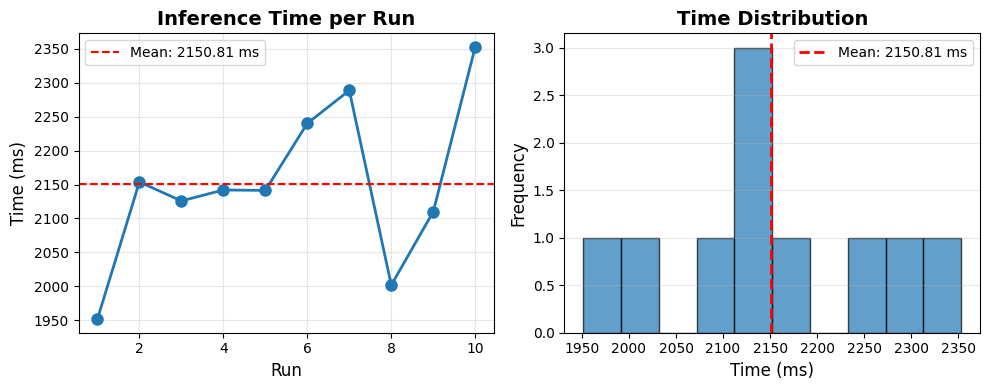

In [25]:
import time

print("⏱️  Running performance benchmark...\n")

# Warm-up run
for _ in range(3):
    _ = processor.set_image(image)
    _ = processor.set_text_prompt(state=_, prompt="person")

# Benchmark
num_runs = 10
times = []

for i in range(num_runs):
    start = time.time()
    _ = processor.set_image(image)
    _ = processor.set_text_prompt(state=_, prompt="person")

    # Synchronize device if using MPS or CUDA
    if device == "mps":
        torch.mps.synchronize()
    elif device == "cuda":
        torch.cuda.synchronize()
    
    elapsed = time.time() - start
    times.append(elapsed)
    print(f"Run {i+1}/{num_runs}: {elapsed*1000:.2f} ms")

# Statistics
mean_time = np.mean(times)
std_time = np.std(times)
min_time = np.min(times)
max_time = np.max(times)

print("\n📊 Benchmark Results:")
print(f"   Mean: {mean_time*1000:.2f} ms")
print(f"   Std:  {std_time*1000:.2f} ms")
print(f"   Min:  {min_time*1000:.2f} ms")
print(f"   Max:  {max_time*1000:.2f} ms")
print(f"   FPS:  {1/mean_time:.2f}")

# Plot timing distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs+1), [t*1000 for t in times], 'o-', linewidth=2, markersize=8)
plt.axhline(mean_time*1000, color='r', linestyle='--', label=f'Mean: {mean_time*1000:.2f} ms')
plt.xlabel('Run', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.title('Inference Time per Run', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist([t*1000 for t in times], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean_time*1000, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_time*1000:.2f} ms')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Time Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 11. Summary

### Key Takeaways:

✅ **Model Loading**: Successfully loaded EfficientSAM3 on ARM device  
✅ **Text Prompts**: Detected objects using natural language  
✅ **Segmentation**: Generated precise segmentation masks  
✅ **Performance**: Measured inference speed and throughput  
✅ **Flexibility**: Tested different confidence thresholds  

### Next Steps:

1. Try your own images
2. Experiment with different text prompts
3. Test on video frames for tracking
4. Fine-tune confidence thresholds for your use case
5. Explore geometric prompts (bounding boxes, points)

## 12. Cleanup

Free up memory by clearing the model and tensors.

In [ ]:
# Clear memory
del model
del processor

# Clear cache
if device == "cuda":
    torch.cuda.empty_cache()
elif device == "mps":
    torch.mps.empty_cache()

print("✅ Memory cleared")